# Zadanie

Napisz (od podstaw) algorytm znajdowania minimum metodą gradientową.
Zaprezentuj jego działanie na przykładzie funkcji $f(x)=x^2$, startując z punktu $x=2$. Zilustruj całą sytuacje oznaczając na wykresie 5 pierwszych iteracji.

2
1.2
0.72
0.432
0.2592
0.15552


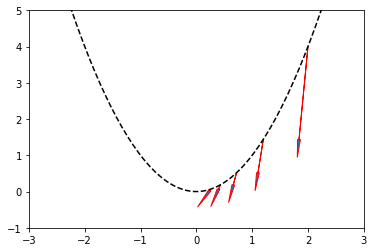

In [1]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: x**2

x = np.linspace(-5, 5, 200)
y = f(x)
plt.plot(x, y, '--k', ms=10)


def step_gradient_1d(x_current, learningRate):
    x_gradient = 2*x_current * learningRate
    new_x = x_current - x_gradient

    plt.arrow(x_current, f(x_current), - (learningRate * x_gradient), -(f(x_current)-f(new_x)),
              head_width=0.05, head_length=0.5,ec="red")

    return new_x
def gradient_descent_runner_1d(starting_x, learning_rate, num_iterations):
    x = starting_x
    print(x)
    for i in range(num_iterations):
        x = step_gradient_1d(x,learning_rate)
        print(x)
    return x

learning_rate = 0.2
initial_x = 2
num_iterations = 5
x = gradient_descent_runner_1d(initial_x, learning_rate, num_iterations)

plt.ylim(-1,5)
plt.xlim(-3,3)
plt.show()


# Zadanie
Wykonaj powyższe zadania dla 
  * learning_rate = 0.001
  * learning_rate = 0.1
  * learning_rate = 0.2
  * learning_rate = 0.5
  * learning_rate = 0.9
  * learning_rate = 0.99
  * learning_rate = 0.999

2
2
2
2
2
2
2


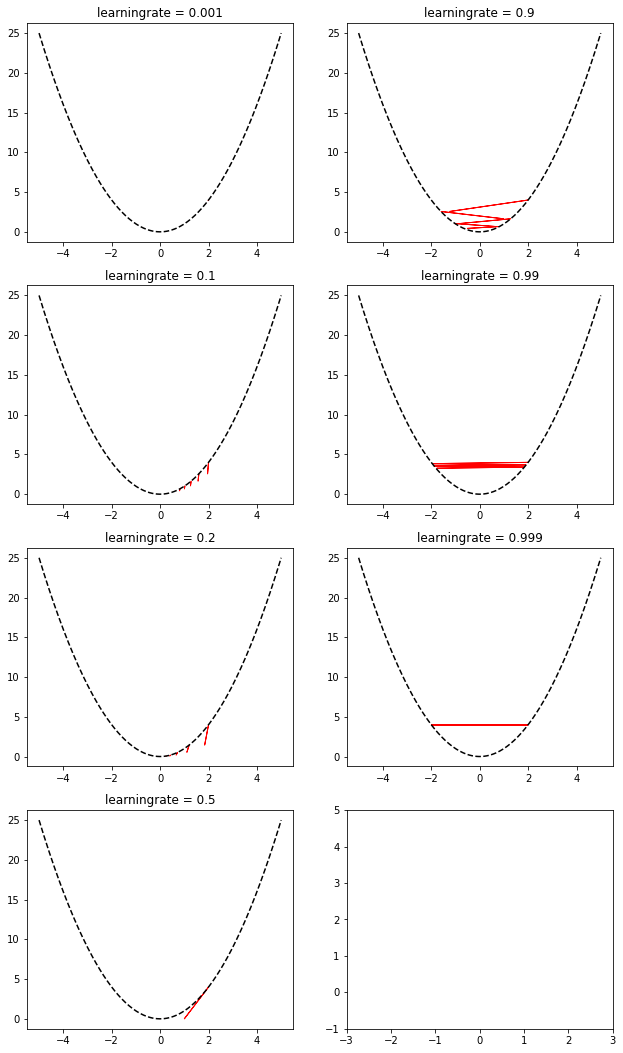

In [2]:
fig, axs = plt.subplots(4,2)
learningrates = [0.001,0.1,0.2,0.5,0.9,0.99,0.999]
def step_gradient_1d(x_current, learningRate,ax):
    x_gradient = 2*x_current * learningRate
    new_x = x_current - x_gradient

    ax.arrow(x_current, f(x_current), - (learningRate * x_gradient), -(f(x_current)-f(new_x)),
             ec="red")

    return new_x
def gradient_descent_runner_1d(starting_x, learning_rate, num_iterations,ax):
    x = starting_x
    print(x)
    for i in range(num_iterations):
        x = step_gradient_1d(x,learning_rate,ax)
        # print(x)
    return x

k = 0
j = 0
for l in learningrates:
     x = np.linspace(-5, 5, 200)
     y = f(x)
     axs[k][j].plot(x, y, '--k', ms=10)
     gradient_descent_runner_1d(initial_x, l, num_iterations,axs[k][j])
     axs[k][j].set_title(f'learningrate = {l}')
     k += 1
     if k == 4:
         k = 0
         j = 1


plt.ylim(-1,5)
plt.xlim(-3,3)
fig.set_size_inches(10.5,18.5)
fig.savefig('zad2.png', dpi=100)
plt.show()

# Zadanie 2

Napisz (od podstaw) algorytm znajdowania minimum metodą gradientową.
Zaprezentuj jego działanie na przykładzie funkcji 

$$
f(x,y)=4*x^2-2x+y^2,
$$ 

startując z punktu $(x,y)=(2,2)$. Zilustruj całą sytuacje oznaczając na wykresie kilka pierwszych iteracji.
Wykonaj obrazek 3D.

In [3]:

###########
import math
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

plt.close('all')
mpl.rcParams['legend.fontsize'] = 10
fun = lambda x,y: 4*(x**2)-2*x+(y**2)

# fig = plt.figure()
# ax = fig.gca(projection='3d')
ax = plt.figure().add_subplot(projection='3d')
# Make data.
X = np.arange(-7, 7, 0.25)
Y = np.arange(-7, 7, 0.25)
X, Y = np.meshgrid(X, Y)
Z = fun(X, Y)




#####################################

def step_gradient_2d(x_current, y_current, learningRate):
    x_gradient = (-2+8*x_current)*learningRate
    y_gradient = 2*y_current*learningRate
    
    new_x = x_current - x_gradient
    new_y = y_current - y_gradient

    ax.quiver(x_current, y_current, fun(x_current, y_current),
               (learningRate * x_gradient), (learningRate * y_gradient),
              -fun(x_current, y_current) + fun(new_x, new_y))
    
    return [new_x, new_y]

def gradient_descent_runner_2d(starting_x, starting_y, learning_rate, num_iterations):
    x = starting_x
    y = starting_y
    for i in range(num_iterations):
        x, y = step_gradient_2d(x, y, learning_rate)
        # print(x, y)
    return [x, y]


learning_rate = 0.01
initial_x = 2 # initial y-intercept guess
initial_y = 2 # initial slope guess
num_iterations = 1000

[x, y] = gradient_descent_runner_2d(initial_x, initial_y, learning_rate, num_iterations)


#####################################
ax.set_zlim(-100,100)
start = ax.plot([initial_x],[initial_y],[fun(initial_x,initial_y)],"ok",label='starting point')
end = ax.plot([x],[y],[fun(x,y)],"or",label='endpoint')
# Plot the 3d surface
surface = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0.01, antialiased=True, alpha=0.3)
ax.legend(loc='best')
fig.set_size_inches(18,12, forward=True)
plt.show()
print(x,y)


<IPython.core.display.Javascript object>

0.25000000000000033 3.3659347144319058e-09


# Zadanie
Wykonaj analogiczne zadanie ale z:
  * initial_x = 5 
  * initial_y = 0 
  * num_iterations = 10

In [4]:
plt.close('all')
mpl.rcParams['legend.fontsize'] = 10
fun = lambda x,y: 4*(x**2)-2*x+(y**2)

# fig = plt.figure()
# ax = fig.gca(projection='3d')
ax = plt.figure().add_subplot(projection='3d')
# Make data.
X = np.arange(-7, 7, 0.25)
Y = np.arange(-7, 7, 0.25)
X, Y = np.meshgrid(X, Y)
Z = fun(X, Y)




#####################################

def step_gradient_2d(x_current, y_current, learningRate):
    x_gradient = (-2+8*x_current)*learningRate
    y_gradient = 2*y_current*learningRate

    new_x = x_current - x_gradient
    new_y = y_current - y_gradient

    ax.quiver(x_current, y_current, fun(x_current, y_current),
               (learningRate * x_gradient), (learningRate * y_gradient),
              -fun(x_current, y_current) + fun(new_x, new_y))

    return [new_x, new_y]

def gradient_descent_runner_2d(starting_x, starting_y, learning_rate, num_iterations):
    x = starting_x
    y = starting_y
    for i in range(num_iterations):
        x, y = step_gradient_2d(x, y, learning_rate)
        # print(x, y)
    return [x, y]


learning_rate = 0.015
initial_x = 5 # initial y-intercept guess
initial_y = 0 # initial slope guess
num_iterations = 1000

[x, y] = gradient_descent_runner_2d(initial_x, initial_y, learning_rate, num_iterations)


#####################################
ax.set_zlim(-100,100)
start = ax.plot([initial_x],[initial_y],[fun(initial_x,initial_y)],"ok",label='starting point')
end = ax.plot([x],[y],[fun(x,y)],"or",label='endpoint')
# Plot the 3d surface
surface = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0.01, antialiased=True, alpha=0.3)
ax.legend(loc='best')
fig.set_size_inches(18,12, forward=True)
plt.show()
print(x,y)

<IPython.core.display.Javascript object>

0.2500000000000002 0.0


# Zadanie
Wykonaj analogiczne zadanie ale z obrazkiem 2d

$$
f(x,y)=x^2-2x+y^2,
$$ 

oraz

$$
f(x,y)=4*x^2-2x+y^2,
$$ 


In [5]:
import numpy as np
import matplotlib.pyplot as plt

chi2 = lambda x,y: x**2-2*x+y**2

x = np.arange(-10,10,0.02)
y = np.arange(-10,10,0.02)

X,Y= np.meshgrid(x,y)

Z = chi2(X,Y)

plt.figure()
CS = plt.contour(X,Y,Z)

plt.plot([5],[5],"o")

#####################################

def step_gradient_2d(x_current, y_current, learningRate):
    x_gradient = 2*x_current-2
    y_gradient = 2*y_current
    
    new_x = x_current - (learningRate * x_gradient)
    new_y = y_current - (learningRate * y_gradient)
    
    plt.arrow(x_current, y_current, - (learningRate * x_gradient), - (learningRate * y_gradient), head_width=0.4, head_length=0.2,ec="red")
    
    return [new_x, new_y]
def gradient_descent_runner_2d(starting_x, starting_y, learning_rate, num_iterations):

    x = starting_x
    y = starting_y
    for i in range(num_iterations):
        x, y = step_gradient_2d(x, y, learning_rate)
        #print(x, y)
    return [x, y]


learning_rate = 0.1
initial_x = 5 # initial y-intercept guess
initial_y = 5 # initial slope guess
num_iterations = 10
[x, y] = gradient_descent_runner_2d(initial_x, initial_y, learning_rate, num_iterations)


#####################################
plt.axis('equal')
plt.show()



<IPython.core.display.Javascript object>

# Zadanie 3

Napisz (od podstaw) algorytm znajdowania minimum metodą gradientową.
Zaprezentuj jego działanie na przykładzie funkcji $f(x)=x^2-y^2$, startując z punktu $x=5$ oraz $x=1$. Zilustruj całą sytuacje oznaczając na wykresie 5 pierwszych iteracji.

Wykonaj rysunek:
  
  * 2D conture plot
  * 3D 
  
Co się stanie gdy zaczniemy z punktu $x=5$ oraz $x=0$? 

In [6]:
f = lambda x,y: x**2 - y++2
fx = lambda x,y: 2*x
fy = lambda x,y: -2*y

x = np.arange(-10,10,0.02)
y = np.arange(-10,10,0.02)

X,Y= np.meshgrid(x,y)

Z = f(X,Y)




learning_rate = 0.1

def gradientMethodWithContour(s_point,ax,learning_rate,num_iterations):
    ax.contour(X,Y,Z)
    ax.plot(s_point[0],s_point[1],"o")
    ax.set_aspect('equal')
    def step_gradient(x_current, y_current, learningRate):
        x_gradient = fx(x_current,y_current)
        y_gradient = fy(x_current,y_current)

        new_x = x_current - (learningRate * x_gradient)
        new_y = y_current - (learningRate * y_gradient)

        ax.arrow(x_current, y_current, - (learningRate * x_gradient), - (learningRate * y_gradient), head_width=0.4, head_length=0.2,ec="red")

        return new_x, new_y

    def gradient_descent_runner(starting_x, starting_y, learning_rate, num_iterations):
        x = starting_x
        y = starting_y
        for i in range(num_iterations):
            x, y = step_gradient(x, y, learning_rate)
            # print(x, y)
        return x, y

    x,y = gradient_descent_runner(s_point[0],s_point[1], learning_rate, num_iterations)
    ax.plot(x,y,"o")
    ax.set_title(f'gradient method (contourplot) P={s_point}')
    plt.show()

def gradientMethod3D(s_point,ax,learning_rate,num_iterations):
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0.01, antialiased=True, alpha=0.3)
    ax.plot(s_point[0],s_point[1],f(*s_point),"o")
    def step_gradient(x_current, y_current, learningRate):
        x_gradient = fx(x_current, y_current)
        y_gradient = fy(x_current, y_current)

        new_x = x_current - x_gradient*learningRate
        new_y = y_current - y_gradient*learningRate

        ax.quiver(x_current, y_current, f(x_current, y_current),
                   -(learningRate * x_gradient), -(learningRate * y_gradient),
                  - f(x_current, y_current) + f(new_x, new_y))

        return new_x, new_y

    def gradient_descent_runner(starting_x, starting_y, learning_rate, num_iterations):
        x = starting_x
        y = starting_y
        for i in range(num_iterations):
            x, y = step_gradient(x, y, learning_rate)
            print(x, y)
        return x, y

    x, y= gradient_descent_runner(s_point[0],s_point[1], learning_rate, num_iterations)
    ax.plot(x,y,f(x,y),"o")
    ax.set_title(f'gradient method 3d P={s_point}')
    plt.show()


# # gradientMethodWithContour(P1,ax,learning_rate,5)
# gradientMethod3D(P2,ax,learning_rate,5)
# # plt.show()


In [7]:
ax1 = plt.figure().add_subplot()
P1 = (5,1)
gradientMethodWithContour(P1,ax1,learning_rate,5)
ax2 = plt.figure().add_subplot(projection='3d')
gradientMethod3D(P1,ax2,learning_rate,5)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

4.0 1.2
3.2 1.44
2.56 1.728
2.048 2.0736
1.6384 2.48832


In [8]:
ax3 = plt.figure().add_subplot()
P2 = (5,0)
gradientMethodWithContour(P2,ax3,learning_rate,50)
ax4 = plt.figure().add_subplot(projection='3d')
gradientMethod3D(P2,ax4,learning_rate,5)
# tutaj aproksymacja przybliza wspolrzedna x, ale nie schodzi juz z poddziedziny okreslonej krzywa y=0. Wyniki aproksymacji dla P1 i P2 sa takie same, ale sposob przechodzenia
# do minimum przez wektory gradientow sa inne

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

4.0 0.0
3.2 0.0
2.56 0.0
2.048 0.0
1.6384 0.0
